## Prediction Using Decision Tree Classifier
Creating a Decision Tree classifier and visualizing it graphically for the given ‘Iris’ dataset.

### Importing the libraries

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [83]:
df = pd.read_csv("Iris.csv")   # Reading the dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [84]:
df = pd.read_csv("Iris.csv", index_col = "Id")   # Setting the index column as "Id" 
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape   # Dimensions of the dataframe

(150, 5)

In [10]:
df.info()   # Checking general information about the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [13]:
df.isnull().sum()  # Checking for any NULL values

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [14]:
df['Species'].value_counts()  # Checking the number of examples for each distinct species

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

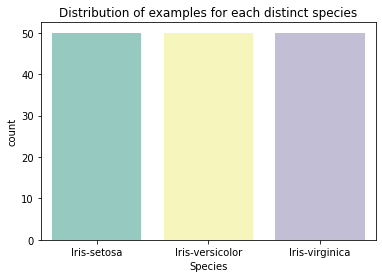

In [20]:
import seaborn as sns
sns.countplot(x = df['Species'], palette = 'Set3')
plt.title("Distribution of examples for each distinct species")
plt.show()

### Separating the features and target variables into X and y dataframes to further use it for training and testing data

In [23]:
X = df.drop('Species', axis = 1)  # Features
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [24]:
y = df[['Species']]  # Target variable
y.head()

,Species
Id,
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
5,Iris-setosa


In [25]:
print("Features (Number of examples, Number of features) : ", X.shape)
print("Target (Number of examples, Number of features) : ", y.shape)

Features (Number of examples, Number of features) :  (150, 4)
Target (Number of examples, Number of features) :  (150, 1)


### Splitting the Data into Training and Testing Data

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### Fitting the Training Data into the Classifier

In [50]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state= 0).fit(X_train, y_train)

### Visualizing the Decision Tree

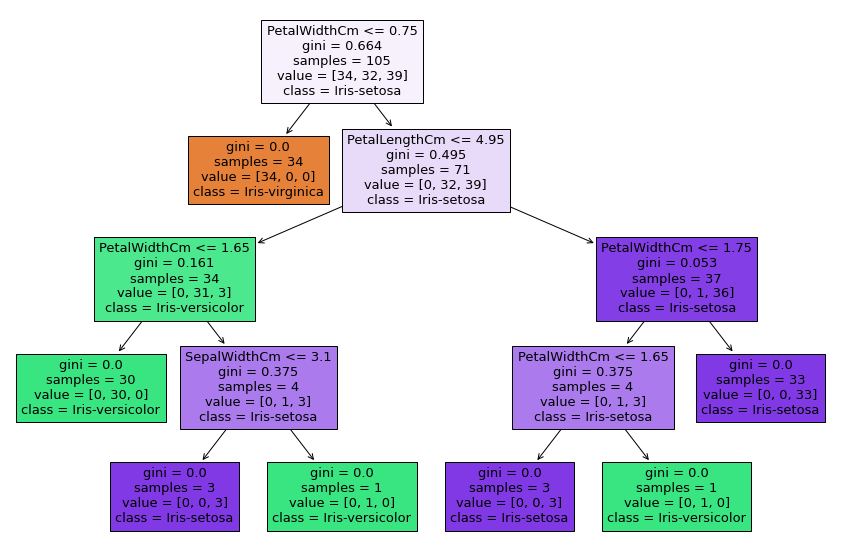

In [91]:
from sklearn import tree
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
classes = ['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']
fig = plt.figure(figsize = (15,10))
tree.plot_tree(clf, feature_names = features, class_names = classes, filled = True);

### Evaluating the Accuracy

In [64]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
clf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Classifier: {}%" .format(round(clf_accuracy * 100, 2)))

Accuracy of Classifier: 97.78%


### Predicting on new data

In [92]:
# [SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

sample1 = clf.predict([[5.1, 5.7, 5.3, 0.1]])
sample2 = clf.predict([[4.1, 4.7, 4, 1.5]])
sample3 = clf.predict([[5.1, 6.7, 6, 1.1]])

print("Class Predicted for sample 1: {}" .format(sample1.item()))
print("Class Predicted for sample 2: {}" .format(sample2.item()))
print("Class Predicted for sample 3: {}" .format(sample3.item()))

Class Predicted for sample 1: Iris-setosa
Class Predicted for sample 2: Iris-versicolor
Class Predicted for sample 3: Iris-virginica
